In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint
from scipy.optimize import Bounds

In [2]:
hf = pd.read_csv('HFdata.csv')
etf = pd.read_csv('ETF_data.csv')
hf = hf[12:-4]
hf = hf.reset_index()

In [3]:
hedge_funds = hf.T.index[2:]
hf = hf[hedge_funds]
hf = hf/100
etfs = etf.T.index[1:]
etf = etf[etfs]

In [4]:
hedge_funds

Index(['Commodity', 'FX', 'ILS', 'UCITS', 'Relative_Value', 'Multi_Strategy',
       'Long_Short_Equity', 'Event_Driven', 'Distressed_Debt', 'CTA',
       'Arbitrage', 'FOF'],
      dtype='object')

In [5]:
results = pd.DataFrame(columns = etfs)
results['Tracking Error'] = ''
column_name = np.array(results.T.index, dtype = str)

In [6]:
column_name

array(['SPY', 'IYR', 'IWN', 'EFA', 'EEM', 'GSG', 'TLT', 'USIG', 'HYG',
       'VXX', 'VMFXX', 'Tracking Error'], dtype='<U14')

In [7]:
def minVar (beta, *args):
    
    y = args[0]
    x = args[1]
    
    return np.var(y - np.dot(x,beta))


def mini (*args, fun = 'MV', bnds, cons):
    
    y = args[0]
    x = args[1]
    
    init_beta = np.zeros(x.shape[1])
    
    if (fun == 'MSE'):
        xopt = minimize(
        meanSqError,
        init_beta,
        method = 'SLSQP',
        args = args,
        bounds = bnds,
        constraints = cons)
    elif (fun == 'MV'):
        xopt = minimize(
        minVar,
        init_beta,
        method = 'SLSQP',
        args = args,
        bounds = bnds,
        constraints = cons)
    
    return xopt

### Variance Minimization with Constraints

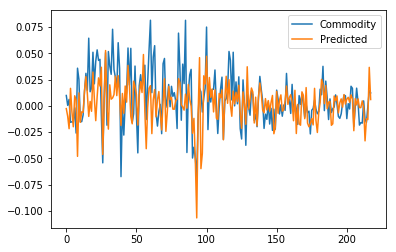

The Correlation of Commodity Hedge Fund with linearly regressed portfolio is:  0.5361673900550162
The tracking error for Commodity Hedge Fund is: 0.022378104733995527


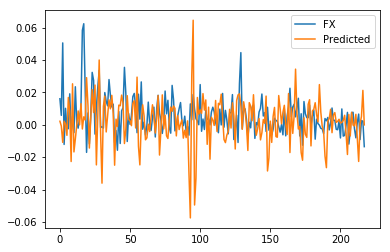

The Correlation of FX Hedge Fund with linearly regressed portfolio is:  0.08834902910203359
The tracking error for FX Hedge Fund is: 0.017631975379467386


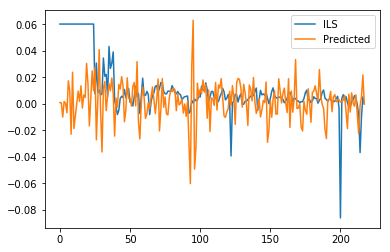

The Correlation of ILS Hedge Fund with linearly regressed portfolio is:  0.0843558425732199
The tracking error for ILS Hedge Fund is: 0.02381418238228476


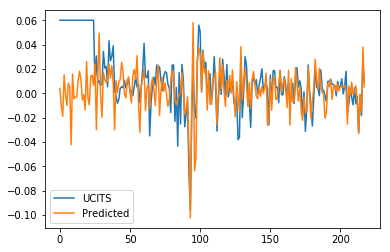

The Correlation of UCITS Hedge Fund with linearly regressed portfolio is:  0.4372189626426694
The tracking error for UCITS Hedge Fund is: 0.02337128159034044


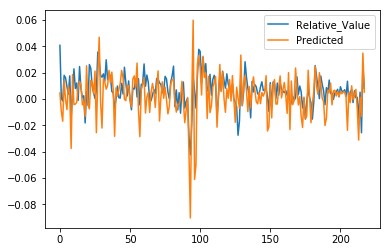

The Correlation of Relative_Value Hedge Fund with linearly regressed portfolio is:  0.5748163550931746
The tracking error for Relative_Value Hedge Fund is: 0.013559448541990765


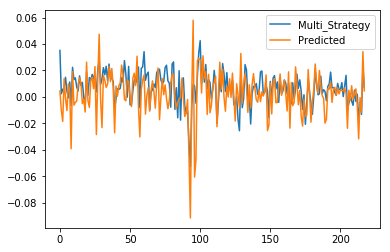

The Correlation of Multi_Strategy Hedge Fund with linearly regressed portfolio is:  0.6076799347038785
The tracking error for Multi_Strategy Hedge Fund is: 0.013314009401769153


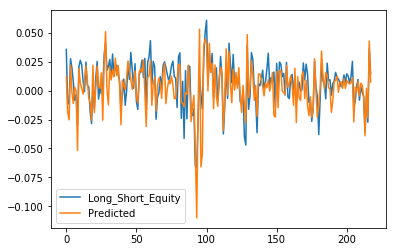

The Correlation of Long_Short_Equity Hedge Fund with linearly regressed portfolio is:  0.767965797222168
The tracking error for Long_Short_Equity Hedge Fund is: 0.01335043290436233


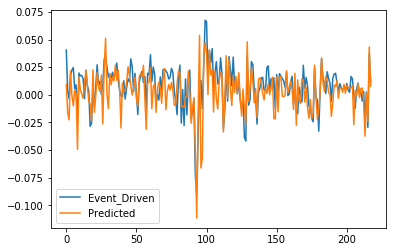

The Correlation of Event_Driven Hedge Fund with linearly regressed portfolio is:  0.7194504922196999
The tracking error for Event_Driven Hedge Fund is: 0.014485765757159194


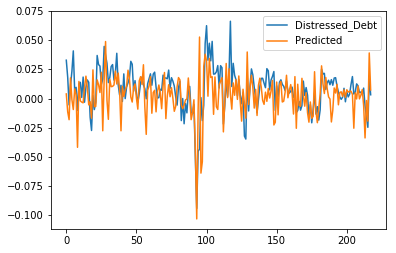

The Correlation of Distressed_Debt Hedge Fund with linearly regressed portfolio is:  0.5265953871707911
The tracking error for Distressed_Debt Hedge Fund is: 0.017399004081362135


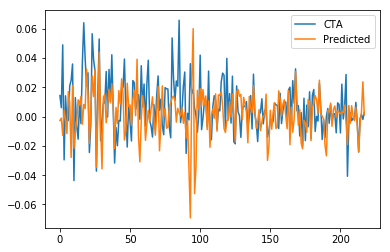

The Correlation of CTA Hedge Fund with linearly regressed portfolio is:  0.31234086886439283
The tracking error for CTA Hedge Fund is: 0.01983061624195347


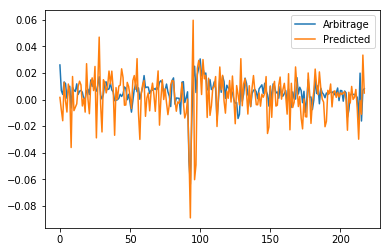

The Correlation of Arbitrage Hedge Fund with linearly regressed portfolio is:  0.5256828200662959
The tracking error for Arbitrage Hedge Fund is: 0.013767477103067416


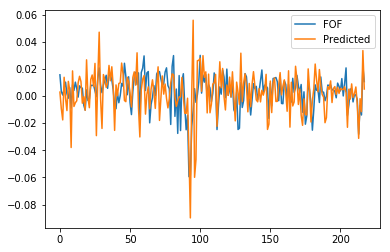

The Correlation of FOF Hedge Fund with linearly regressed portfolio is:  0.5321464573229505
The tracking error for FOF Hedge Fund is: 0.014335926361564265


In [8]:
for elem in hedge_funds:
    etf = np.array(etf)
    hf[elem] = np.array(hf[elem])
    
    #c = LinearConstraint(np.ones(len(etf.T)), 1, 1, True)
    b = Bounds(lb = np.zeros(len(etf.T)), ub = np.full_like(np.ones(len(etf.T)), None))
    
    c = ({'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})
    
    beta = mini(hf[elem], etf, fun = 'MV', bnds = b, cons = c).x
    
    predicted = np.dot(etf,beta)
    
    plt.plot(hf[elem], label = elem)
    plt.plot(predicted, label = 'Predicted')
    plt.legend()
    plt.show()
    te = np.std(np.array(hf[elem]) - np.array(predicted))
    print('The Correlation of ' + elem + ' Hedge Fund with linearly regressed portfolio is: ', np.corrcoef(predicted, hf[elem])[0][1])
    print('The tracking error for ' + elem + ' Hedge Fund is:', te)
    
    dummy = list(beta)
    dummy.append(te)
    dummy = np.array(dummy, dtype = float)
    weights = pd.DataFrame([dummy], columns = column_name)
    results = results.append(weights)

In [9]:
results

,SPY,IYR,IWN,EFA,EEM,GSG,TLT,USIG,HYG,VXX,VMFXX,Tracking Error
0,0.055605,2.775558e-17,0.016791,0.045769,3.468408e-02,0.153913,0.200923,0.179822,0.111960,0.000499,0.200033,0.022378
0,0.059473,6.938894e-18,0.014879,0.012828,1.050809e-03,0.032449,0.279444,0.233484,0.090732,0.001696,0.273966,0.017632
0,0.049041,3.562087e-03,0.014861,0.000000,1.404042e-17,0.049443,0.278701,0.239291,0.093045,0.000810,0.271246,0.023814
0,0.070081,4.317949e-02,0.049125,0.050878,2.680260e-02,0.073213,0.200820,0.193042,0.087207,0.000720,0.204931,0.023371
0,0.088836,2.951642e-02,0.056042,0.049787,9.490920e-03,0.047305,0.213150,0.194639,0.085776,0.000778,0.224680,0.013559
0,0.082889,1.910807e-02,0.041289,0.052919,2.201364e-02,0.062377,0.216493,0.195244,0.085422,0.000960,0.221284,0.013314
0,0.108437,1.371997e-02,0.073092,0.078955,6.129470e-02,0.059089,0.163583,0.171010,0.066657,0.000648,0.203514,0.013350
0,0.102721,3.303737e-02,0.075983,0.068751,4.249793e-02,0.064118,0.162819,0.175061,0.073036,0.000531,0.201443,0.014486
0,0.092625,3.765718e-02,0.064094,0.056543,8.309895e-03,0.076847,0.184745,0.188620,0.075573,0.000000,0.214986,0.017399
0,0.048999,0.000000e+00,0.003075,0.016470,0.000000e+00,0.081078,0.278667,0.218202,0.106378,0.001681,0.245449,0.019831


In [10]:
results.set_index(np.array(hedge_funds, dtype = str), inplace = True)

In [11]:
results

,SPY,IYR,IWN,EFA,EEM,GSG,TLT,USIG,HYG,VXX,VMFXX,Tracking Error
Commodity,0.055605,2.775558e-17,0.016791,0.045769,3.468408e-02,0.153913,0.200923,0.179822,0.111960,0.000499,0.200033,0.022378
FX,0.059473,6.938894e-18,0.014879,0.012828,1.050809e-03,0.032449,0.279444,0.233484,0.090732,0.001696,0.273966,0.017632
ILS,0.049041,3.562087e-03,0.014861,0.000000,1.404042e-17,0.049443,0.278701,0.239291,0.093045,0.000810,0.271246,0.023814
UCITS,0.070081,4.317949e-02,0.049125,0.050878,2.680260e-02,0.073213,0.200820,0.193042,0.087207,0.000720,0.204931,0.023371
Relative_Value,0.088836,2.951642e-02,0.056042,0.049787,9.490920e-03,0.047305,0.213150,0.194639,0.085776,0.000778,0.224680,0.013559
Multi_Strategy,0.082889,1.910807e-02,0.041289,0.052919,2.201364e-02,0.062377,0.216493,0.195244,0.085422,0.000960,0.221284,0.013314
Long_Short_Equity,0.108437,1.371997e-02,0.073092,0.078955,6.129470e-02,0.059089,0.163583,0.171010,0.066657,0.000648,0.203514,0.013350
Event_Driven,0.102721,3.303737e-02,0.075983,0.068751,4.249793e-02,0.064118,0.162819,0.175061,0.073036,0.000531,0.201443,0.014486
Distressed_Debt,0.092625,3.765718e-02,0.064094,0.056543,8.309895e-03,0.076847,0.184745,0.188620,0.075573,0.000000,0.214986,0.017399
CTA,0.048999,0.000000e+00,0.003075,0.016470,0.000000e+00,0.081078,0.278667,0.218202,0.106378,0.001681,0.245449,0.019831


In [12]:
results.shape

(12, 12)

In [13]:
norm_ratio = results.T.sum().tolist()
temp = results.copy()

In [14]:
(temp.iloc[0]/norm_ratio[0]).sum()

1.0

In [15]:
for i in range(0,len(norm_ratio)):
    temp.iloc[i] = temp.iloc[i]/norm_ratio[i]
temp

,SPY,IYR,IWN,EFA,EEM,GSG,TLT,USIG,HYG,VXX,VMFXX,Tracking Error
Commodity,0.054388,2.714805e-17,0.016424,0.044768,3.392490e-02,0.150544,0.196526,0.175886,0.109509,0.000489,0.195655,0.021888
FX,0.058442,6.818667e-18,0.014621,0.012605,1.032602e-03,0.031886,0.274602,0.229439,0.089160,0.001666,0.269219,0.017326
ILS,0.047900,3.479232e-03,0.014515,0.000000,1.371383e-17,0.048293,0.272218,0.233725,0.090881,0.000792,0.264937,0.023260
UCITS,0.068481,4.219338e-02,0.048003,0.049716,2.619049e-02,0.071541,0.196234,0.188633,0.085215,0.000704,0.200251,0.022838
Relative_Value,0.087647,2.912155e-02,0.055292,0.049121,9.363950e-03,0.046672,0.210299,0.192035,0.084628,0.000767,0.221674,0.013378
Multi_Strategy,0.081800,1.885700e-02,0.040747,0.052224,2.172440e-02,0.061558,0.213648,0.192679,0.084300,0.000948,0.218377,0.013139
Long_Short_Equity,0.107008,1.353921e-02,0.072129,0.077914,6.048717e-02,0.058310,0.161428,0.168757,0.065779,0.000640,0.200833,0.013175
Event_Driven,0.101254,3.256563e-02,0.074898,0.067770,4.189110e-02,0.063203,0.160495,0.172561,0.071993,0.000523,0.198567,0.014279
Distressed_Debt,0.091041,3.701319e-02,0.062998,0.055576,8.167784e-03,0.075533,0.181586,0.185395,0.074280,0.000000,0.211309,0.017101
CTA,0.048047,0.000000e+00,0.003015,0.016150,0.000000e+00,0.079501,0.273248,0.213959,0.104310,0.001648,0.240676,0.019445


In [16]:
norm_results = temp.drop(columns = ['Tracking Error'])

In [17]:
norm_results.shape

(12, 11)

In [18]:
norm_results

,SPY,IYR,IWN,EFA,EEM,GSG,TLT,USIG,HYG,VXX,VMFXX
Commodity,0.054388,2.714805e-17,0.016424,0.044768,3.392490e-02,0.150544,0.196526,0.175886,0.109509,0.000489,0.195655
FX,0.058442,6.818667e-18,0.014621,0.012605,1.032602e-03,0.031886,0.274602,0.229439,0.089160,0.001666,0.269219
ILS,0.047900,3.479232e-03,0.014515,0.000000,1.371383e-17,0.048293,0.272218,0.233725,0.090881,0.000792,0.264937
UCITS,0.068481,4.219338e-02,0.048003,0.049716,2.619049e-02,0.071541,0.196234,0.188633,0.085215,0.000704,0.200251
Relative_Value,0.087647,2.912155e-02,0.055292,0.049121,9.363950e-03,0.046672,0.210299,0.192035,0.084628,0.000767,0.221674
Multi_Strategy,0.081800,1.885700e-02,0.040747,0.052224,2.172440e-02,0.061558,0.213648,0.192679,0.084300,0.000948,0.218377
Long_Short_Equity,0.107008,1.353921e-02,0.072129,0.077914,6.048717e-02,0.058310,0.161428,0.168757,0.065779,0.000640,0.200833
Event_Driven,0.101254,3.256563e-02,0.074898,0.067770,4.189110e-02,0.063203,0.160495,0.172561,0.071993,0.000523,0.198567
Distressed_Debt,0.091041,3.701319e-02,0.062998,0.055576,8.167784e-03,0.075533,0.181586,0.185395,0.074280,0.000000,0.211309
CTA,0.048047,0.000000e+00,0.003015,0.016150,0.000000e+00,0.079501,0.273248,0.213959,0.104310,0.001648,0.240676


In [19]:
ETF_from_2011 = pd.read_csv('etf_from_2011.csv')

In [20]:
ETF_from_2011

,Date,SPY,IYR,IWN,EFA,EEM,GSG,TLT,USIG,HYG,VXX,VMFXX
0,2011-01-01,0.023300,0.035740,-0.001266,0.020955,-0.038413,0.031085,-0.030812,0.002977,0.016502,-0.148365,0.000009
1,2011-02-01,0.034737,0.045204,0.050986,0.035498,-0.000437,0.026451,0.012936,0.005170,0.007845,-0.057758,0.000014
2,2011-03-01,-0.004206,-0.019478,0.010185,-0.023883,0.062896,0.034913,-0.002922,-0.006001,-0.005838,-0.026839,0.000029
3,2011-04-01,0.028961,0.046633,0.016052,0.056258,0.027327,0.042570,0.019103,0.015621,0.009678,-0.211440,0.000012
4,2011-05-01,-0.011215,0.010134,-0.016973,-0.022061,-0.029400,-0.068567,0.029822,0.005095,-0.004846,-0.080743,0.000009
5,2011-06-01,-0.021720,-0.039809,-0.024970,-0.030938,-0.019163,-0.059553,-0.026787,-0.010233,-0.011797,-0.007046,0.000008
6,2011-07-01,-0.020005,0.002156,-0.036507,-0.023778,-0.010294,0.031662,0.040595,0.020108,-0.002847,0.107379,0.000009
7,2011-08-01,-0.054976,-0.053119,-0.091051,-0.087549,-0.092549,-0.017050,0.093035,0.003347,-0.033169,0.664246,0.000009
8,2011-09-01,-0.074210,-0.116218,-0.112926,-0.108083,-0.178947,-0.127204,0.128656,-0.001390,-0.059071,0.369867,0.000008
9,2011-10-01,0.109147,0.131896,0.144661,0.096275,0.162678,0.102683,-0.040729,0.013363,0.077870,-0.248454,0.000009


In [21]:
date_from_2011 = pd.DataFrame(ETF_from_2011['Date'])
returns_from_2011 = pd.DataFrame(np.dot(ETF_from_2011.drop(columns = ['Date']), norm_results.T))
results_from_2011 = pd.concat([date_from_2011, returns_from_2011], axis = 1)
column_name = ['Date']
column_name.extend(norm_results.T.columns.tolist())
results_from_2011.columns = column_name
results_from_2011

,Date,Commodity,FX,ILS,UCITS,Relative_Value,Multi_Strategy,Long_Short_Equity,Event_Driven,Distressed_Debt,CTA,Arbitrage,FOF
0,2011-01-01,0.001766,-0.003992,-0.003584,0.001121,0.000510,-0.000055,0.000529,0.001885,0.002748,-0.002378,0.000890,0.000452
1,2011-02-01,0.012568,0.009411,0.009239,0.014524,0.014490,0.013614,0.015731,0.016373,0.015908,0.009866,0.014079,0.013751
2,2011-03-01,0.003982,-0.001956,-0.001178,0.000121,-0.001603,-0.000320,0.002120,0.000992,-0.000709,-0.000510,-0.001867,-0.000689
3,2011-04-01,0.019154,0.013366,0.013405,0.018653,0.017467,0.017764,0.019630,0.019651,0.019026,0.014959,0.017386,0.017595
4,2011-05-01,-0.007007,0.005396,0.004747,-0.001582,0.000594,-0.000559,-0.004477,-0.003861,-0.002359,0.002205,0.000635,-0.000768
5,2011-06-01,-0.020950,-0.014708,-0.015176,-0.018862,-0.017522,-0.017937,-0.018536,-0.018945,-0.019034,-0.017102,-0.017928,-0.018054
6,2011-07-01,0.012922,0.014685,0.015628,0.009376,0.008746,0.009812,0.004456,0.005107,0.007835,0.016339,0.010333,0.010089
7,2011-08-01,0.001455,0.018181,0.018659,-0.001842,0.000550,0.001516,-0.012755,-0.011533,-0.004564,0.018090,0.003739,0.002592
8,2011-09-01,-0.017197,0.018770,0.017883,-0.014354,-0.006979,-0.007634,-0.027436,-0.026266,-0.016530,0.013543,-0.003948,-0.006179
9,2011-10-01,0.036353,0.011563,0.011665,0.037368,0.032853,0.032397,0.047874,0.047258,0.039235,0.014844,0.030219,0.031129


In [22]:
test_ratio = norm_results.iloc[0]
test_ratio

SPY      5.438800e-02
IYR      2.714805e-17
IWN      1.642383e-02
EFA      4.476755e-02
EEM      3.392490e-02
GSG      1.505437e-01
TLT      1.965255e-01
USIG     1.758859e-01
HYG      1.095092e-01
VXX      4.885479e-04
VMFXX    1.956546e-01
Name: Commodity, dtype: float64

In [23]:
test_ETF = ETF_from_2011.iloc[0][1:]
test_ETF

SPY       0.0233001
IYR       0.0357398
IWN     -0.00126595
EFA        0.020955
EEM      -0.0384131
GSG       0.0310851
TLT      -0.0308117
USIG      0.0029771
HYG       0.0165024
VXX       -0.148365
VMFXX         9e-06
Name: 0, dtype: object

In [24]:
a = np.dot(test_ratio, test_ETF.T)
b = np.dot(test_ratio.T, test_ETF)

In [25]:
a

0.0017658347048713178

In [26]:
results_from_2011.to_csv('results2011.csv')